In [34]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
os.getcwd()
features = pd.read_csv('C:\\Users\\nerdc\\OneDrive\\Documents\\R Projects\\NasaDataCapstone\\data\\features_updated.csv')

features.head()

,file_name,a0_spectral_entropy,a0_spectral_centroid,a0_spectral_flatness,a0_spectral_bandwidth,a0_std_dev_time_diff,a0_mean_time_diff,a0_median_time_diff,a0_max_peak,a0_median_peak,...,a1_band_powers,a1_band_ratios,a1_spectrogram_features,a1_spectral_flux,a1_wavelet_energy_features,a1_regime_dominance,a1_rms_change_points,a1_skew_peak_magnitude,a1_kurtosis_peak_magnitude,a1_iqr_peak_magnitude
0,Boiling_at_Heater_T85_RefVideo1.csv,4.126416,2201.371732,0.092940,2969.409434,1.217076,1.400913,1.00726,0.017624,0.016774,...,0,0,0,0.000000e+00,0,0.000000,0.0,0.000000,0.000000,0.000000
1,Boiling_at_Heater_T93_RefVideo2.csv,3.810181,1665.950270,0.043837,1867.012857,0.692469,0.480395,0.17728,0.020698,0.015521,...,0,0,0,0.000000e+00,0,0.000000,0.0,0.000000,0.000000,0.000000
2,Boiling_at_Heater_T98_RefVideo3.csv,3.616228,1387.868379,0.047419,2011.291784,0.000000,0.000000,0.00000,0.000000,0.000000,...,0,0,0,0.000000e+00,0,0.000000,0.0,0.000000,0.000000,0.000000
3,Calm_to_Boiling_50V_on_StartT65.csv,3.840603,1960.671873,0.051595,2179.760527,0.043059,0.035434,0.02181,0.036296,0.023944,...,{'low_band_power': np.float64(0.00577613173273...,{'high_to_low_ratio': np.float64(153.348037926...,{'mean_spectral_entropy_time': np.float64(3.72...,1.015317e-15,{'wavelet_energy_low_scale': np.float64(27.882...,0.040441,0.0,2.525236,9.673339,0.002653
4,Calm_to_Boiling_50V_on_StartT80.csv,3.670040,1446.436442,0.043854,1929.228711,0.000000,0.000000,0.00000,0.000000,0.000000,...,0,0,0,0.000000e+00,0,0.000000,0.0,0.000000,0.000000,0.000000


In [23]:
features.columns

Index(['file_name', 'a0_spectral_entropy', 'a0_spectral_centroid',
       'a0_spectral_flatness', 'a0_spectral_bandwidth', 'a0_std_dev_time_diff',
       'a0_mean_time_diff', 'a0_median_time_diff', 'a0_max_peak',
       'a0_median_peak', 'a0_std_peak', 'a0_peaks_per_second',
       'a0_sum_peak_magnitude', 'a0_percent_time_above_threshold',
       'a0_num_boilings', 'a0_unused_peak_proportion', 'a0_skewness',
       'a0_kurtosis', 'a0_crest_factor', 'a0_rms', 'a0_burstiness',
       'a0_band_powers', 'a0_band_ratios', 'a0_spectrogram_features',
       'a0_spectral_flux', 'a0_wavelet_energy_features', 'a0_regime_dominance',
       'a0_rms_change_points', 'a0_skew_peak_magnitude',
       'a0_kurtosis_peak_magnitude', 'a0_iqr_peak_magnitude',
       'a1_spectral_entropy', 'a1_spectral_centroid', 'a1_spectral_flatness',
       'a1_spectral_bandwidth', 'a1_std_dev_time_diff', 'a1_mean_time_diff',
       'a1_median_time_diff', 'a1_max_peak', 'a1_median_peak', 'a1_std_peak',
       'a1_peaks_

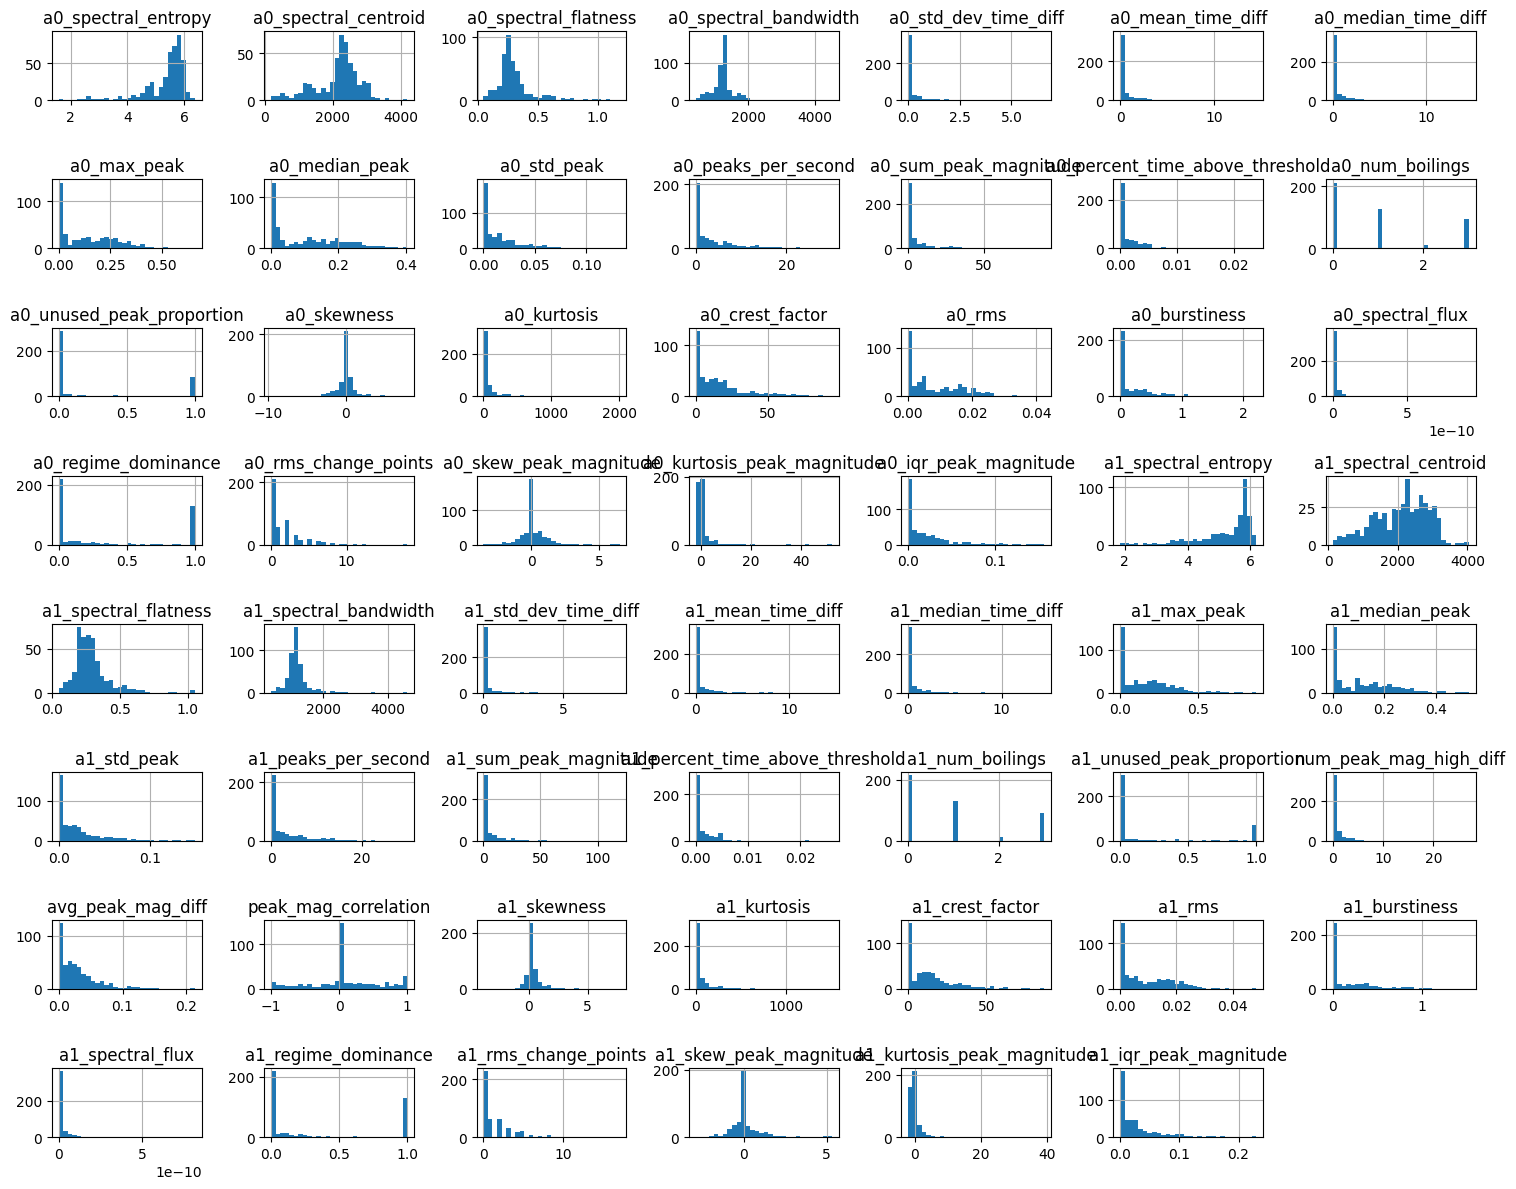

In [24]:
import matplotlib.pyplot as plt

features.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [ ]:
features.info()

<class 'pandas.DataFrame'>
Index: 446 entries, Boiling_at_Heater_T85_RefVideo1.csv to MATLAB 5-05 PM Thu, Oct 10, 2024 Run14.csv
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   a0_spectral_entropy              446 non-null    float64
 1   a0_spectral_centroid             446 non-null    float64
 2   a0_spectral_flatness             446 non-null    float64
 3   a0_spectral_bandwidth            446 non-null    float64
 4   a0_std_dev_time_diff             446 non-null    float64
 5   a0_mean_time_diff                446 non-null    float64
 6   a0_median_time_diff              446 non-null    float64
 7   a0_max_peak                      446 non-null    float64
 8   a0_median_peak                   446 non-null    float64
 9   a0_std_peak                      446 non-null    float64
 10  a0_peaks_per_second              446 non-null    float64
 11  a0_sum_peak_magnitude      

In [39]:
features["a0_spectrogram_features"].head()

file_name
Boiling_at_Heater_T85_RefVideo1.csv    {'mean_spectral_entropy_time': np.float64(3.68...
Boiling_at_Heater_T93_RefVideo2.csv    {'mean_spectral_entropy_time': np.float64(3.35...
Boiling_at_Heater_T98_RefVideo3.csv                                                    0
Calm_to_Boiling_50V_on_StartT65.csv    {'mean_spectral_entropy_time': np.float64(3.37...
Calm_to_Boiling_50V_on_StartT80.csv                                                    0
Name: a0_spectrogram_features, dtype: str

In [41]:
#features = features.set_index("file_name")
numeric_features = features.select_dtypes(include='number')

features_scaled = StandardScaler().fit_transform(numeric_features)

fig = px.box(
    features_scaled,
    points="all",  # shows all data points
)

fig.update_layout(height=800)
fig.show()

In [26]:
fig = px.box(
    features["a0_spectral_entropy"],
    points="all",  # shows all data points
)

fig.update_layout(height=800)
fig.show()

In [28]:
numeric_features.var().sort_values()

a0_spectral_flux                   4.861347e-21
a1_spectral_flux                   6.359279e-21
a0_percent_time_above_threshold    6.723900e-06
a1_percent_time_above_threshold    8.548701e-06
a0_rms                             8.556003e-05
a1_rms                             1.014260e-04
a0_std_peak                        5.025814e-04
a1_std_peak                        7.677293e-04
a0_iqr_peak_magnitude              8.381088e-04
avg_peak_mag_diff                  9.724858e-04
a1_iqr_peak_magnitude              1.380500e-03
a0_median_peak                     1.093947e-02
a1_median_peak                     1.328388e-02
a1_spectral_flatness               1.774837e-02
a0_max_peak                        1.890607e-02
a1_max_peak                        2.580531e-02
a0_spectral_flatness               2.877318e-02
a1_burstiness                      8.788128e-02
a0_burstiness                      1.252522e-01
a1_unused_peak_proportion          1.461144e-01
a0_unused_peak_proportion          1.580

In [30]:
numeric_features.std().sort_values(ascending=False)

a1_spectral_centroid               7.670948e+02
a0_spectral_centroid               6.525021e+02
a1_spectral_bandwidth              3.605114e+02
a0_spectral_bandwidth              3.278208e+02
a0_kurtosis                        2.484355e+02
a1_kurtosis                        1.776555e+02
a0_crest_factor                    1.904885e+01
a1_crest_factor                    1.690868e+01
a1_sum_peak_magnitude              1.146650e+01
a0_sum_peak_magnitude              9.925287e+00
a0_peaks_per_second                5.140523e+00
a1_peaks_per_second                5.134932e+00
a0_kurtosis_peak_magnitude         4.688776e+00
a1_kurtosis_peak_magnitude         3.609945e+00
a0_rms_change_points               2.384281e+00
num_peak_mag_high_diff             2.183764e+00
a1_rms_change_points               2.171579e+00
a1_mean_time_diff                  1.605540e+00
a1_median_time_diff                1.593594e+00
a0_mean_time_diff                  1.555551e+00
a0_median_time_diff                1.541

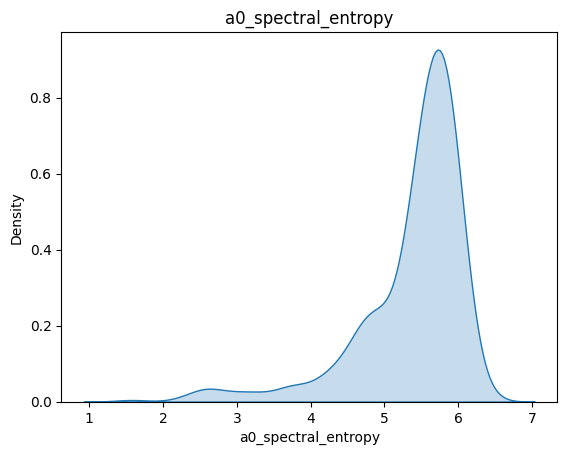

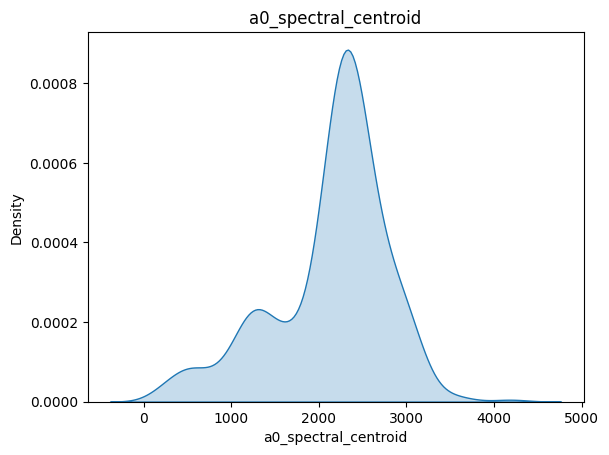

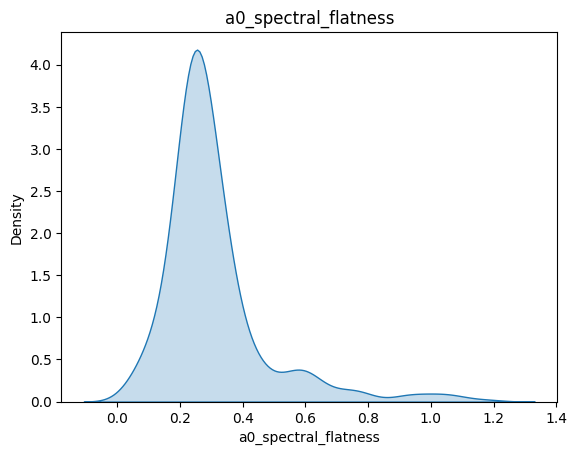

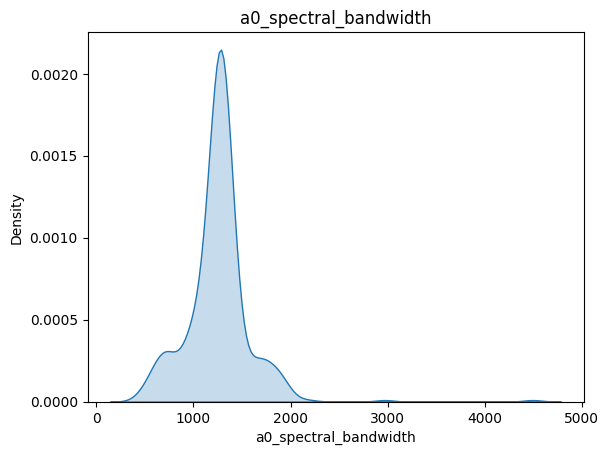

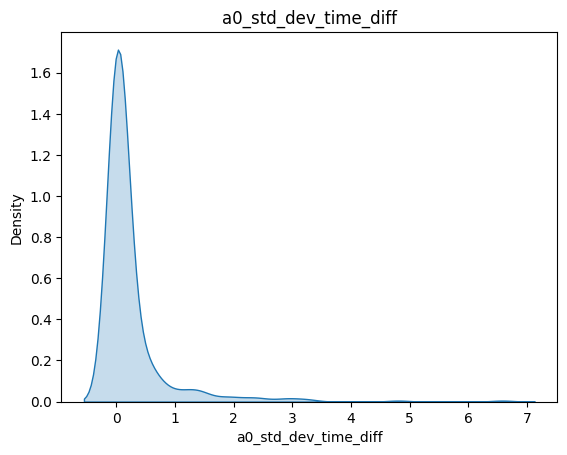

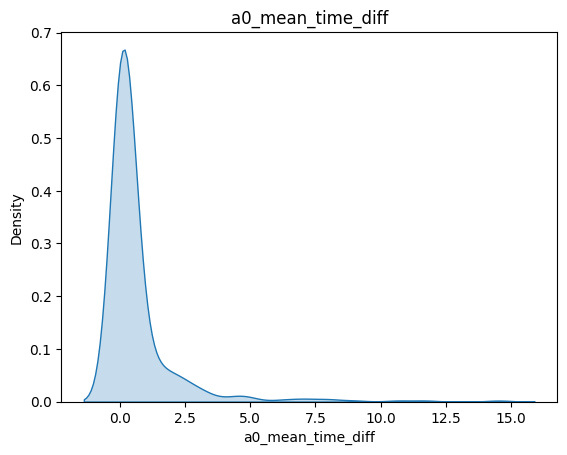

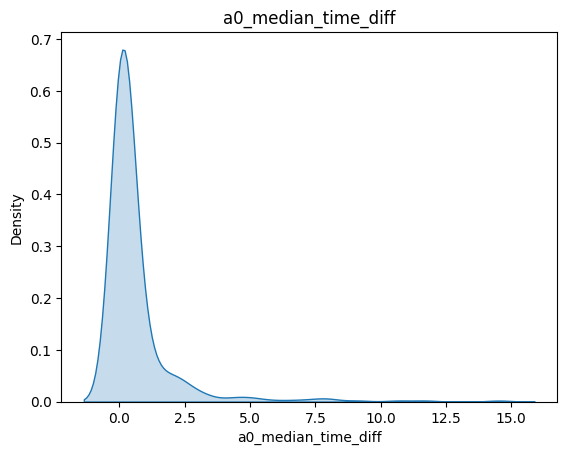

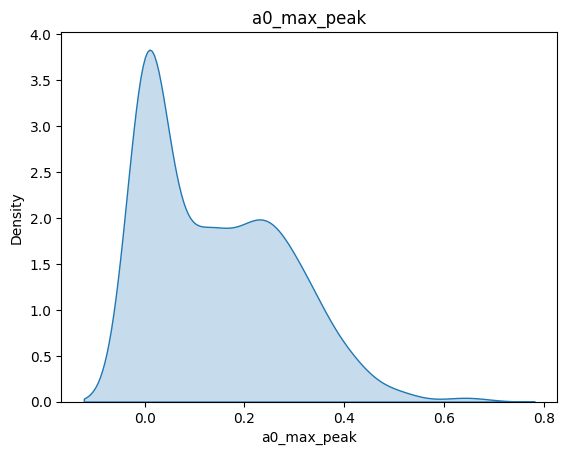

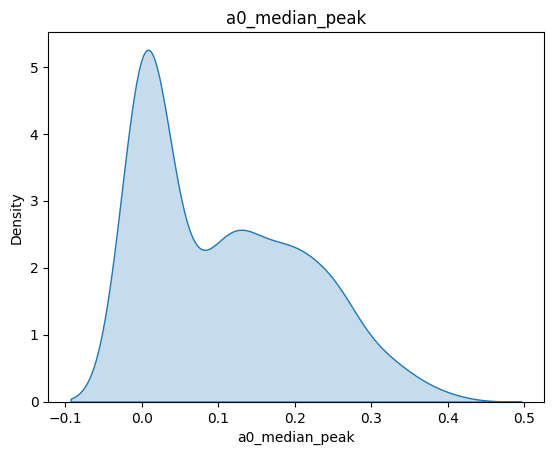

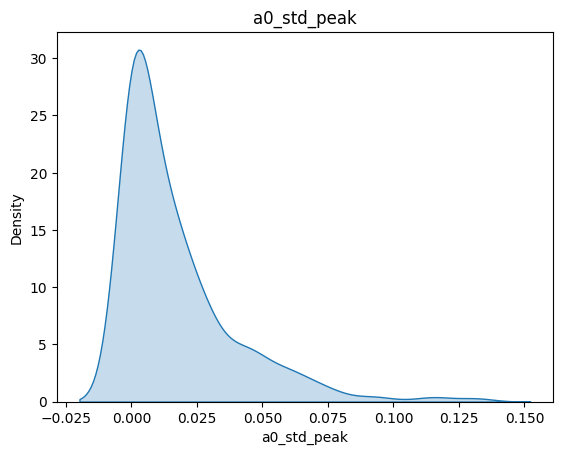

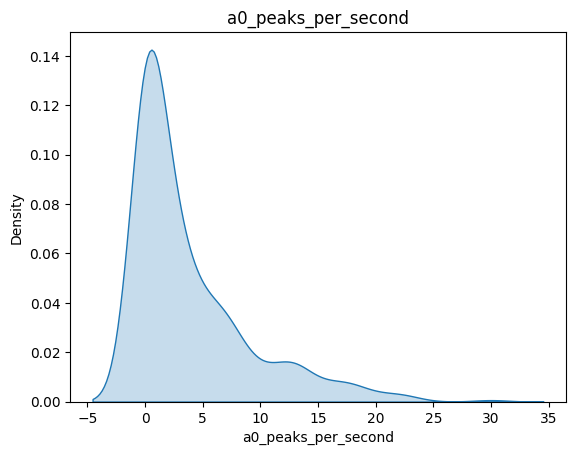

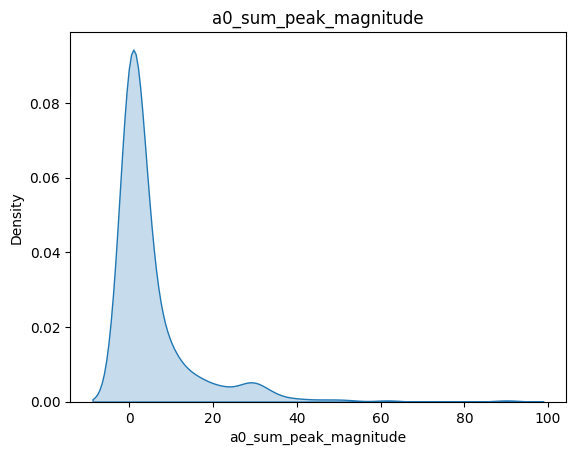

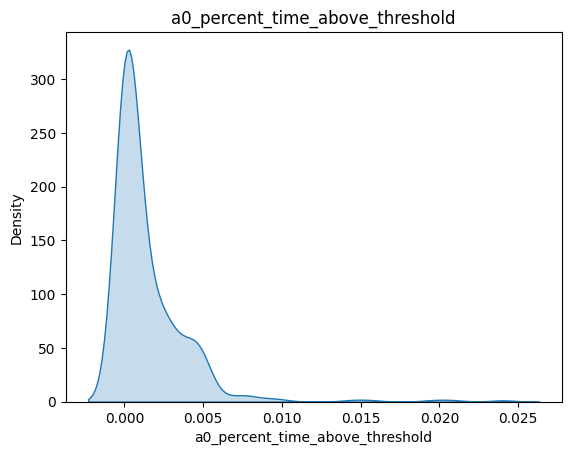

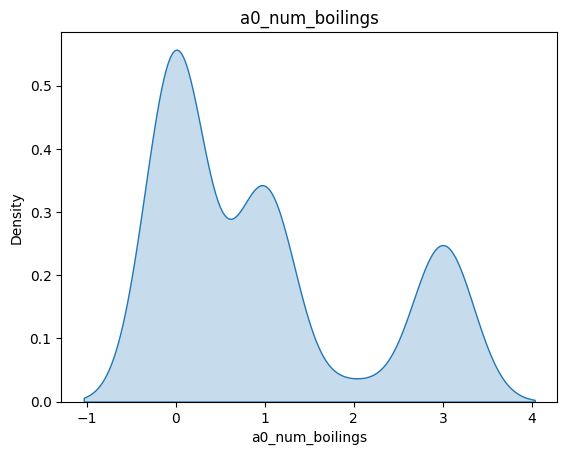

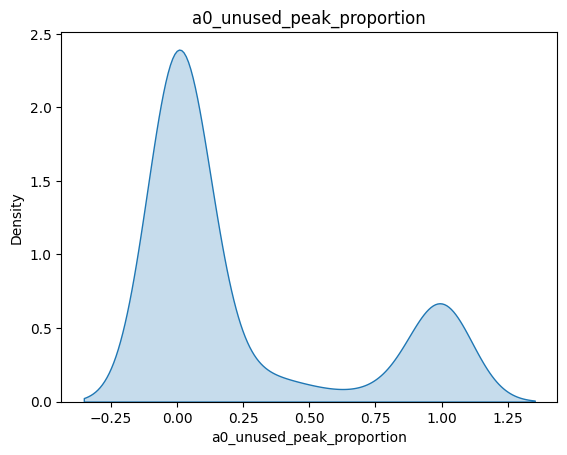

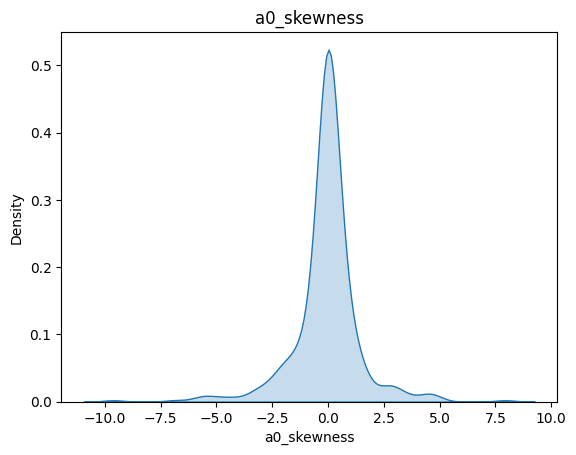

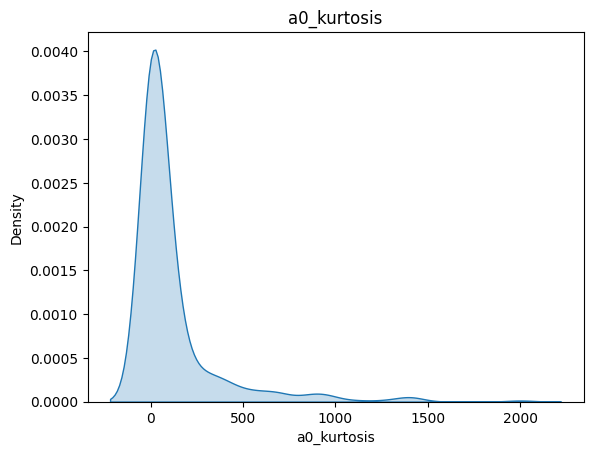

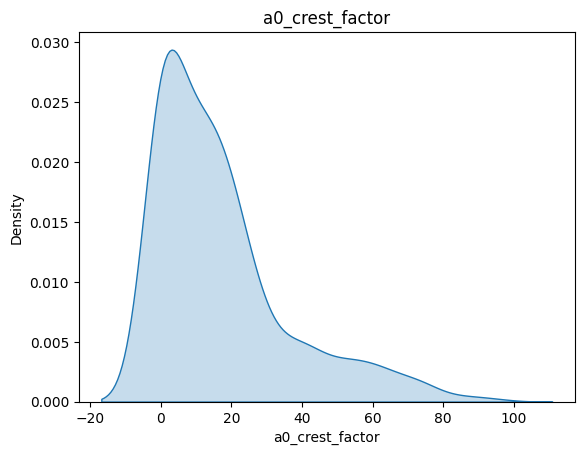

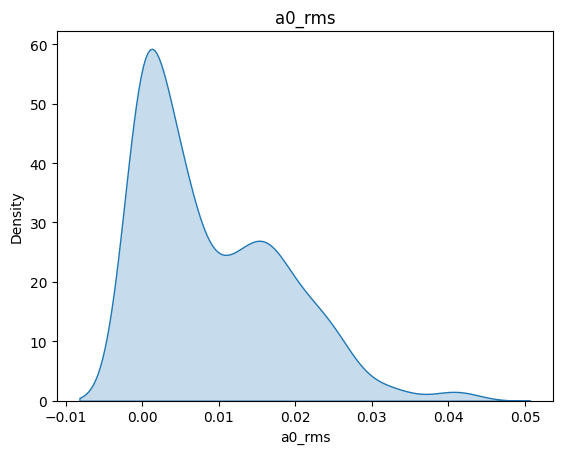

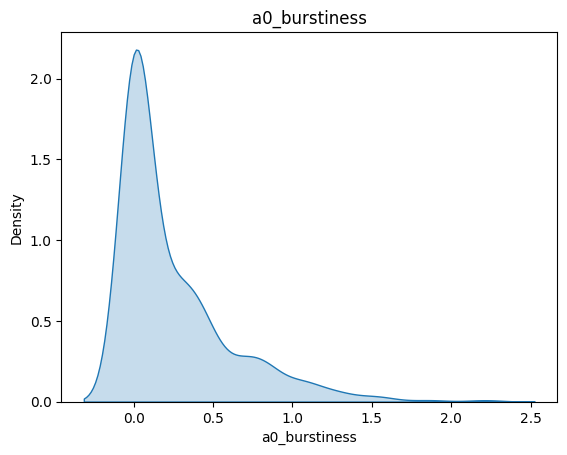

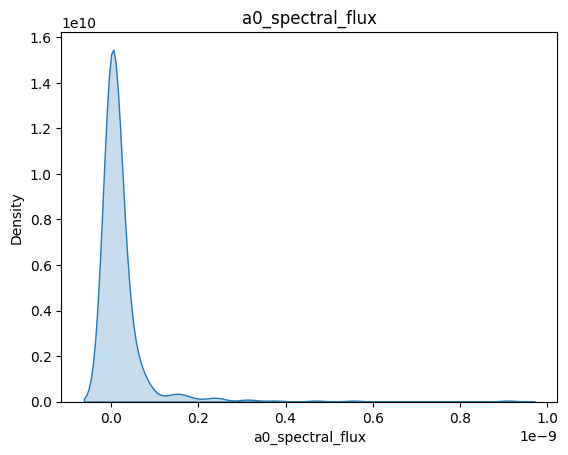

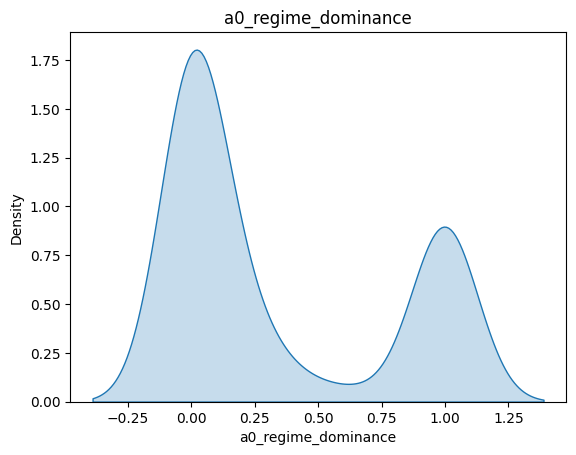

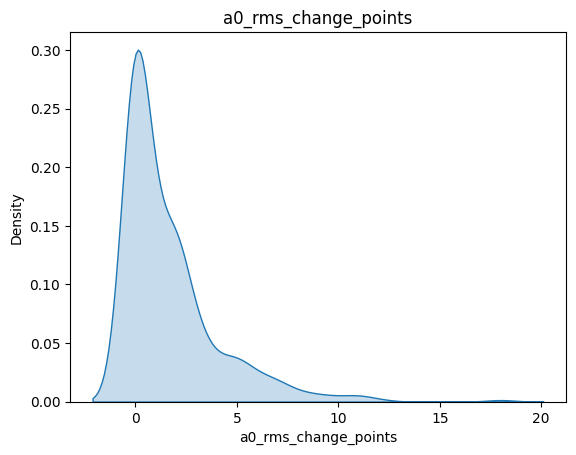

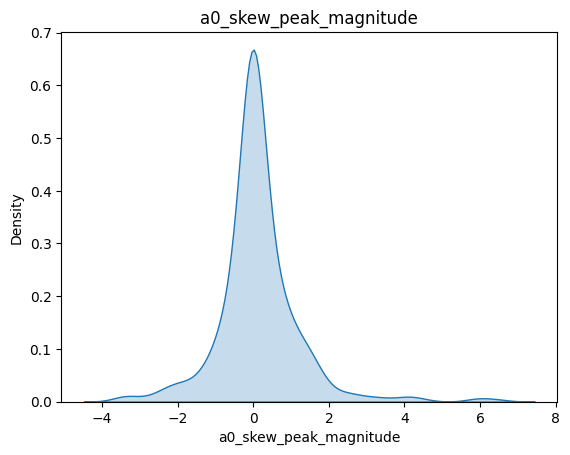

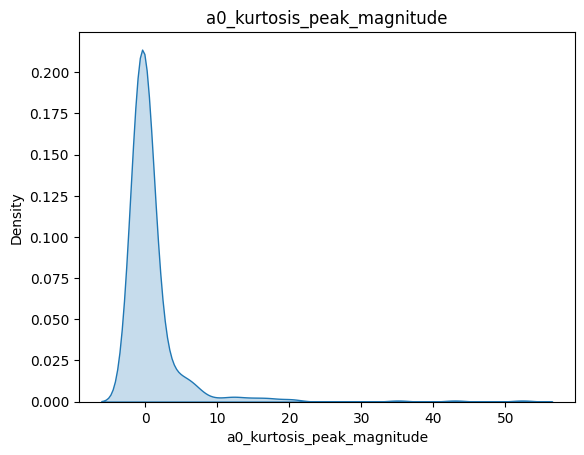

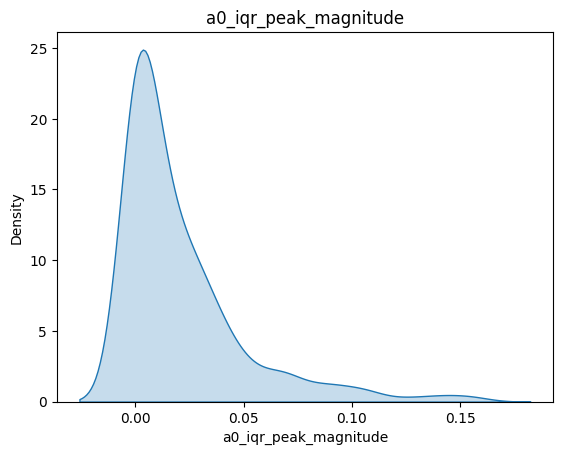

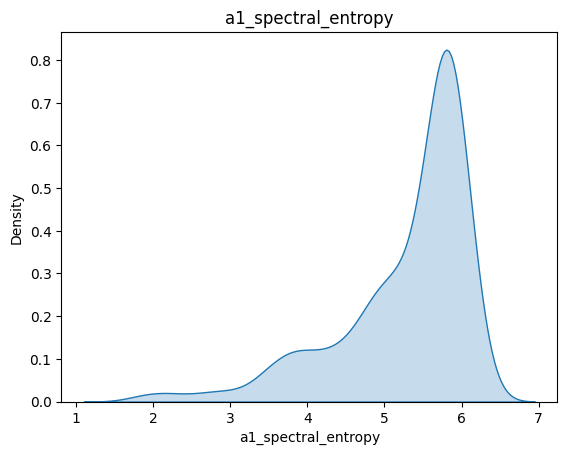

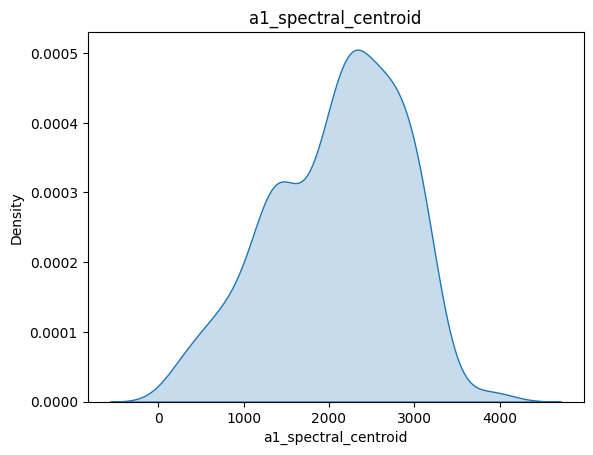

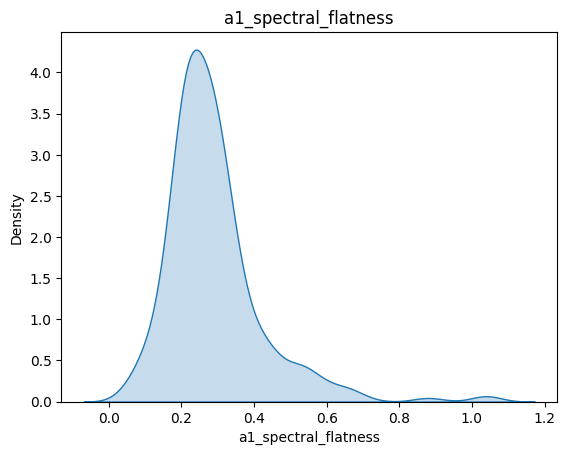

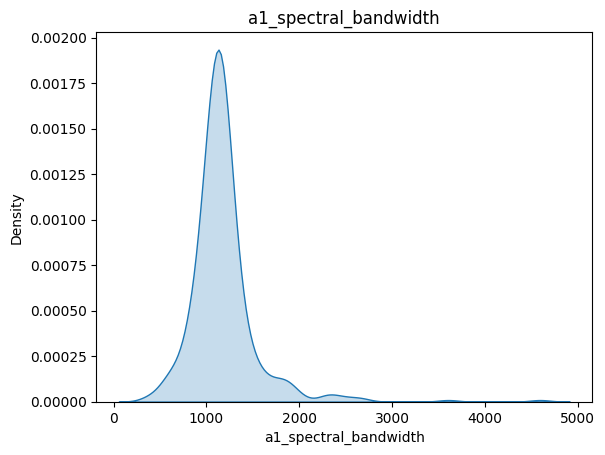

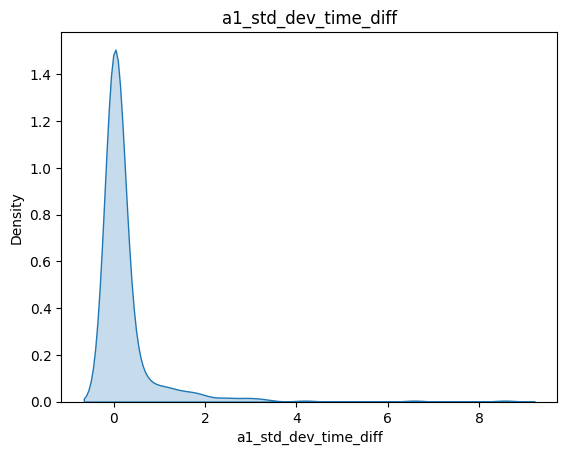

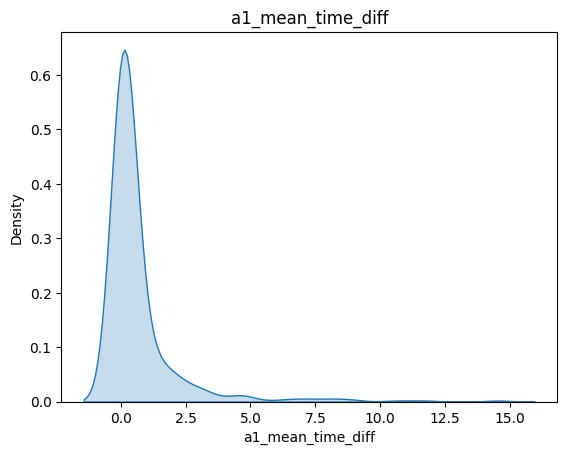

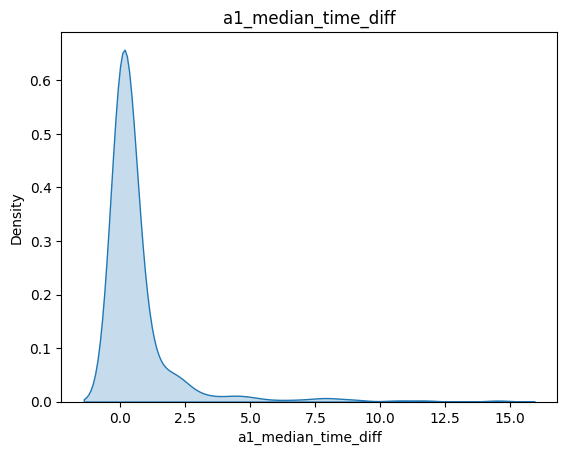

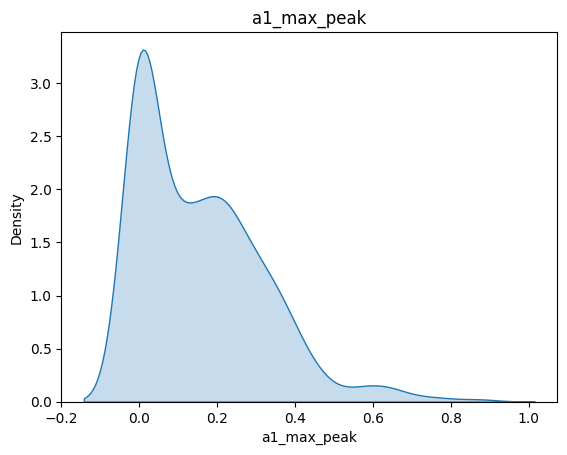

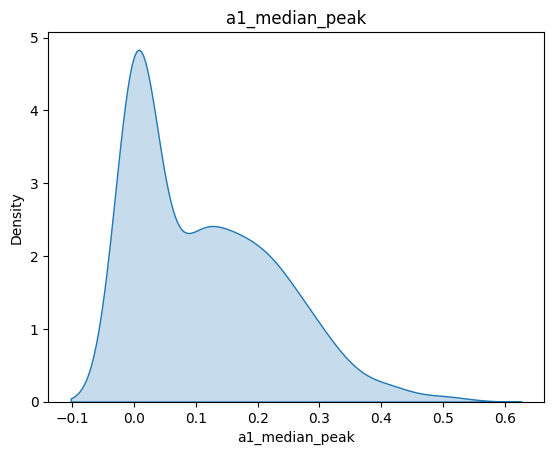

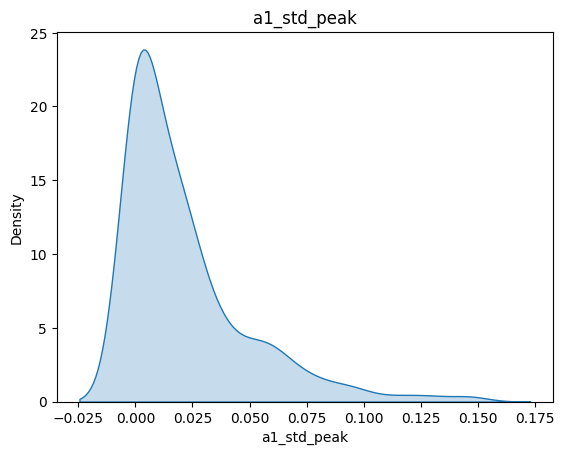

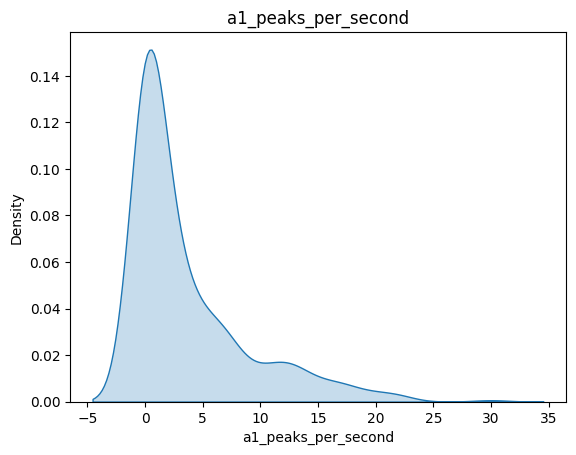

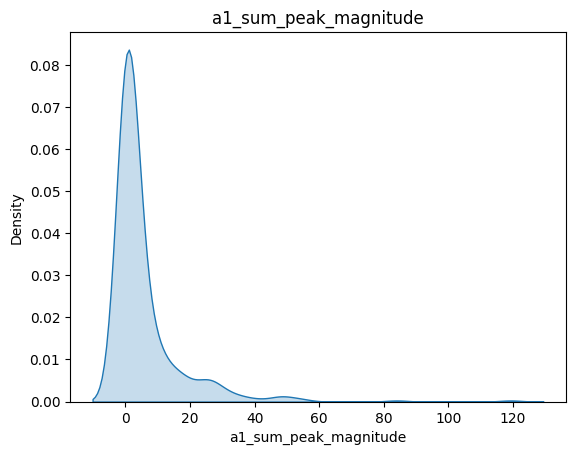

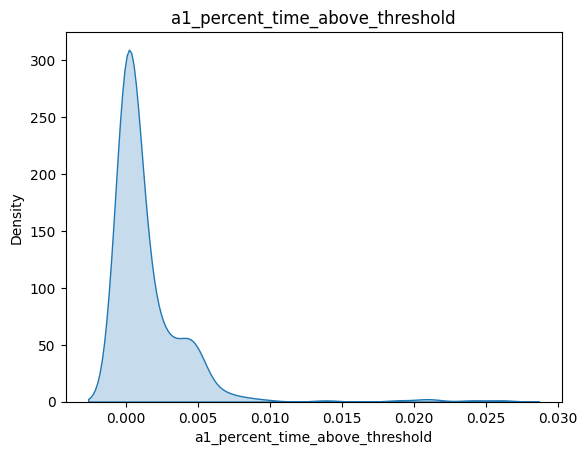

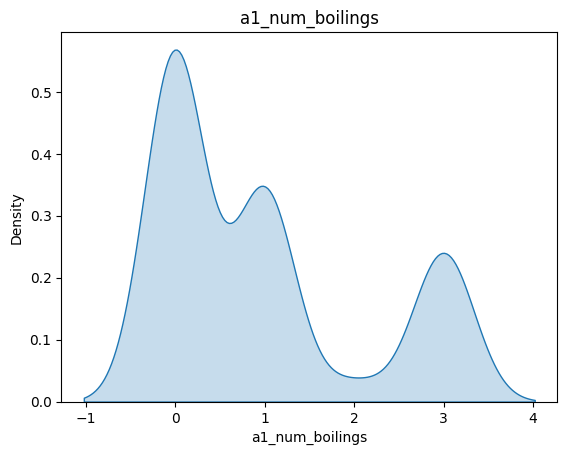

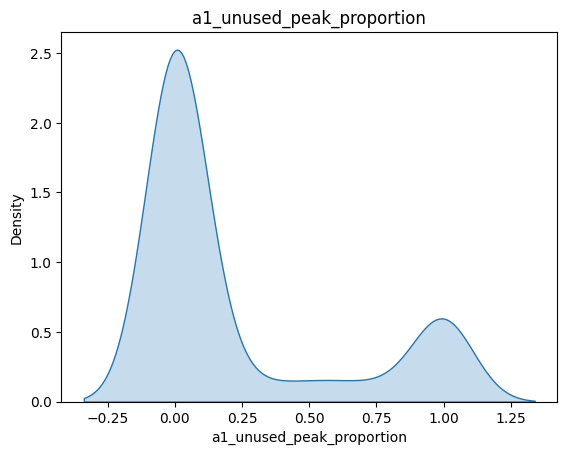

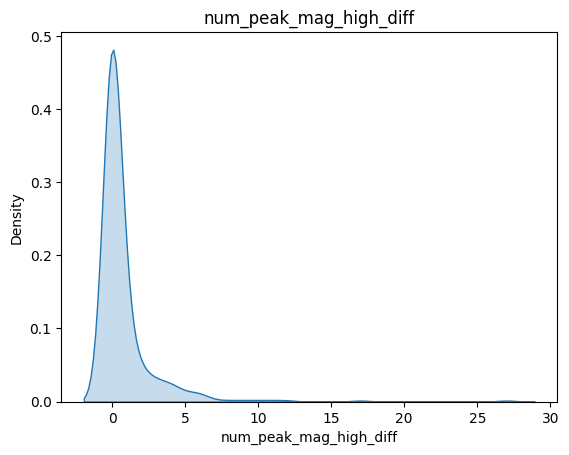

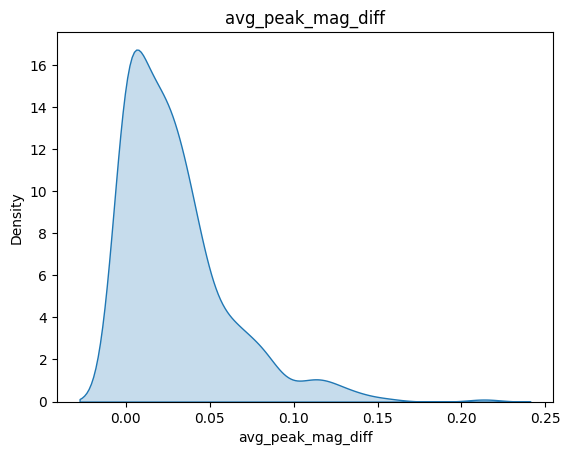

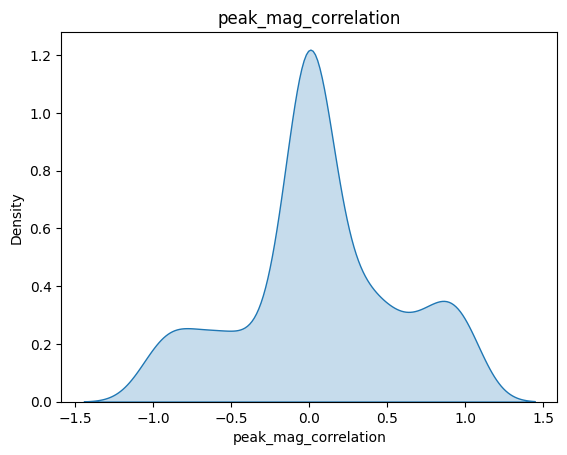

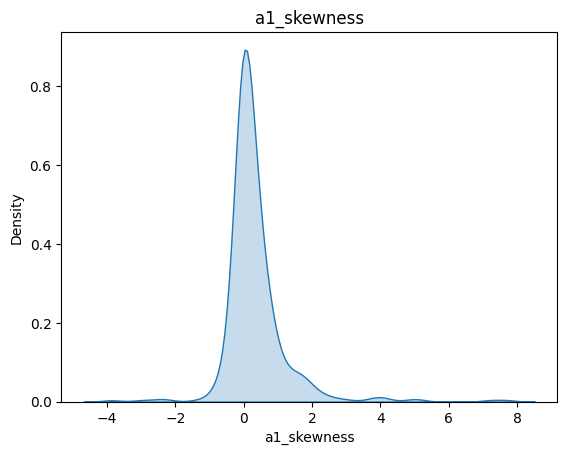

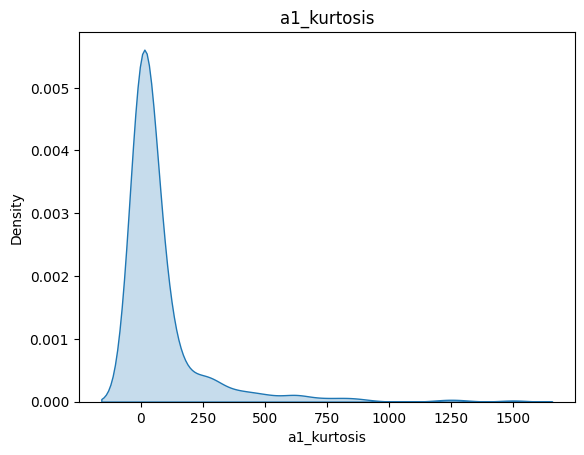

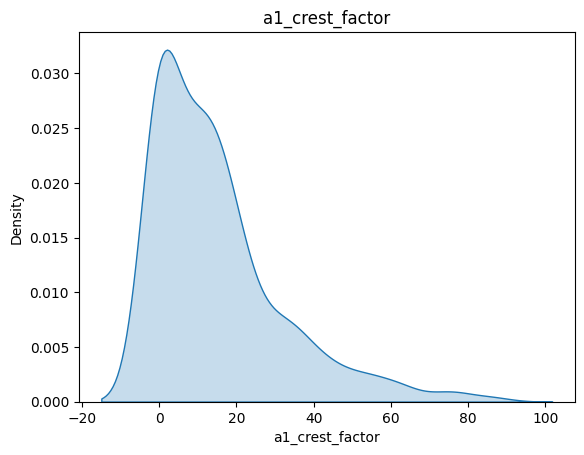

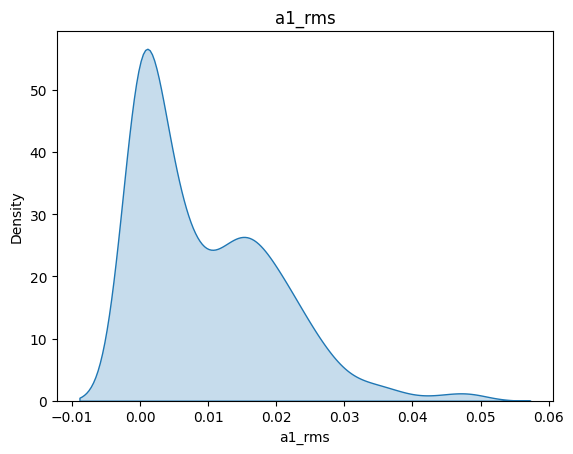

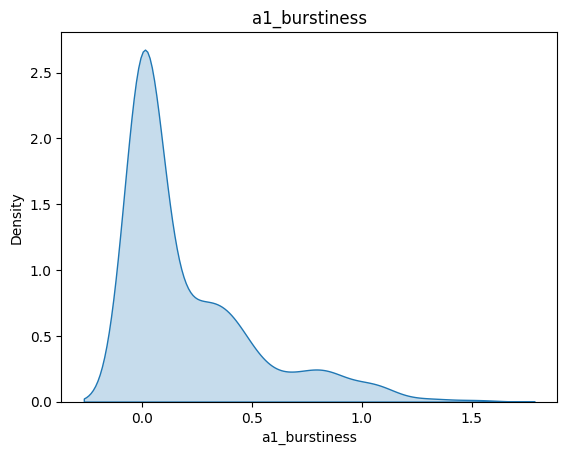

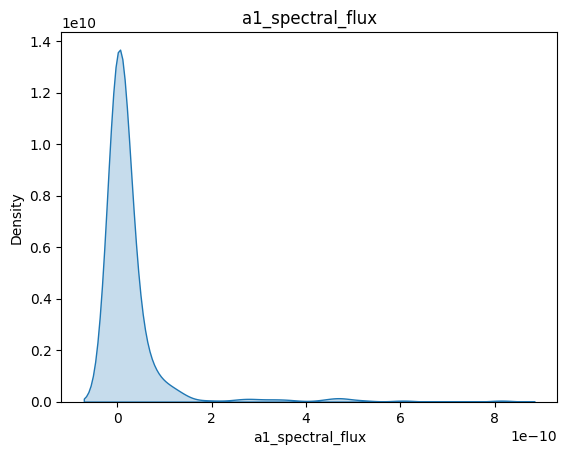

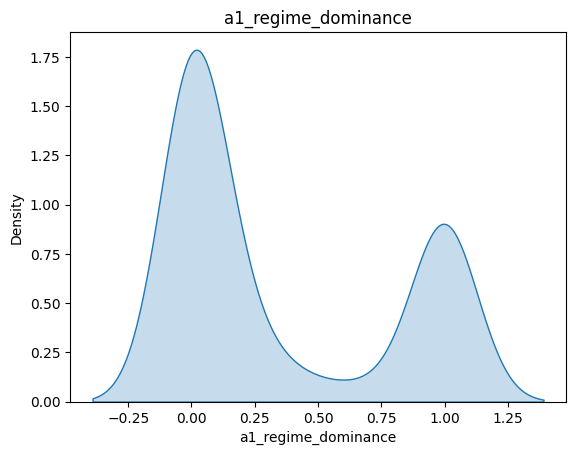

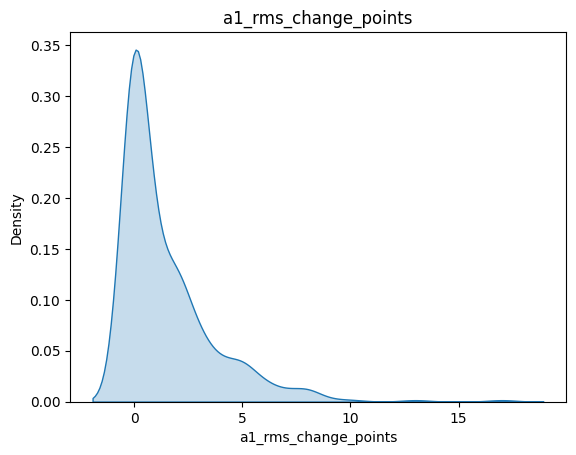

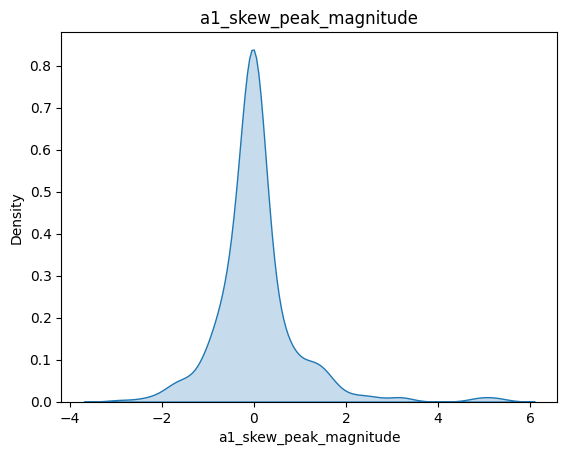

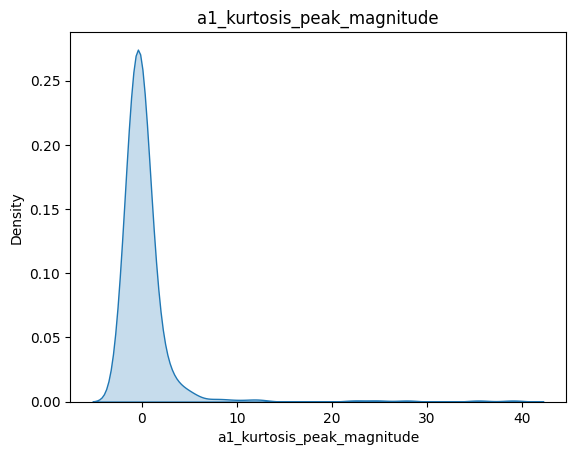

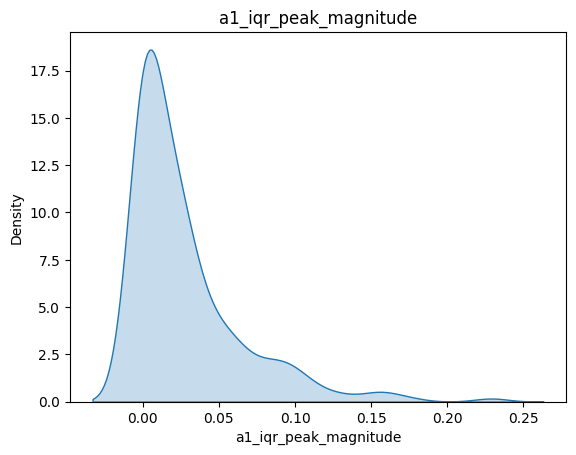

In [33]:
for col in features.select_dtypes(include='number').columns:
    plt.figure()
    sns.kdeplot(features[col], fill=True)
    plt.title(col)
    plt.show()